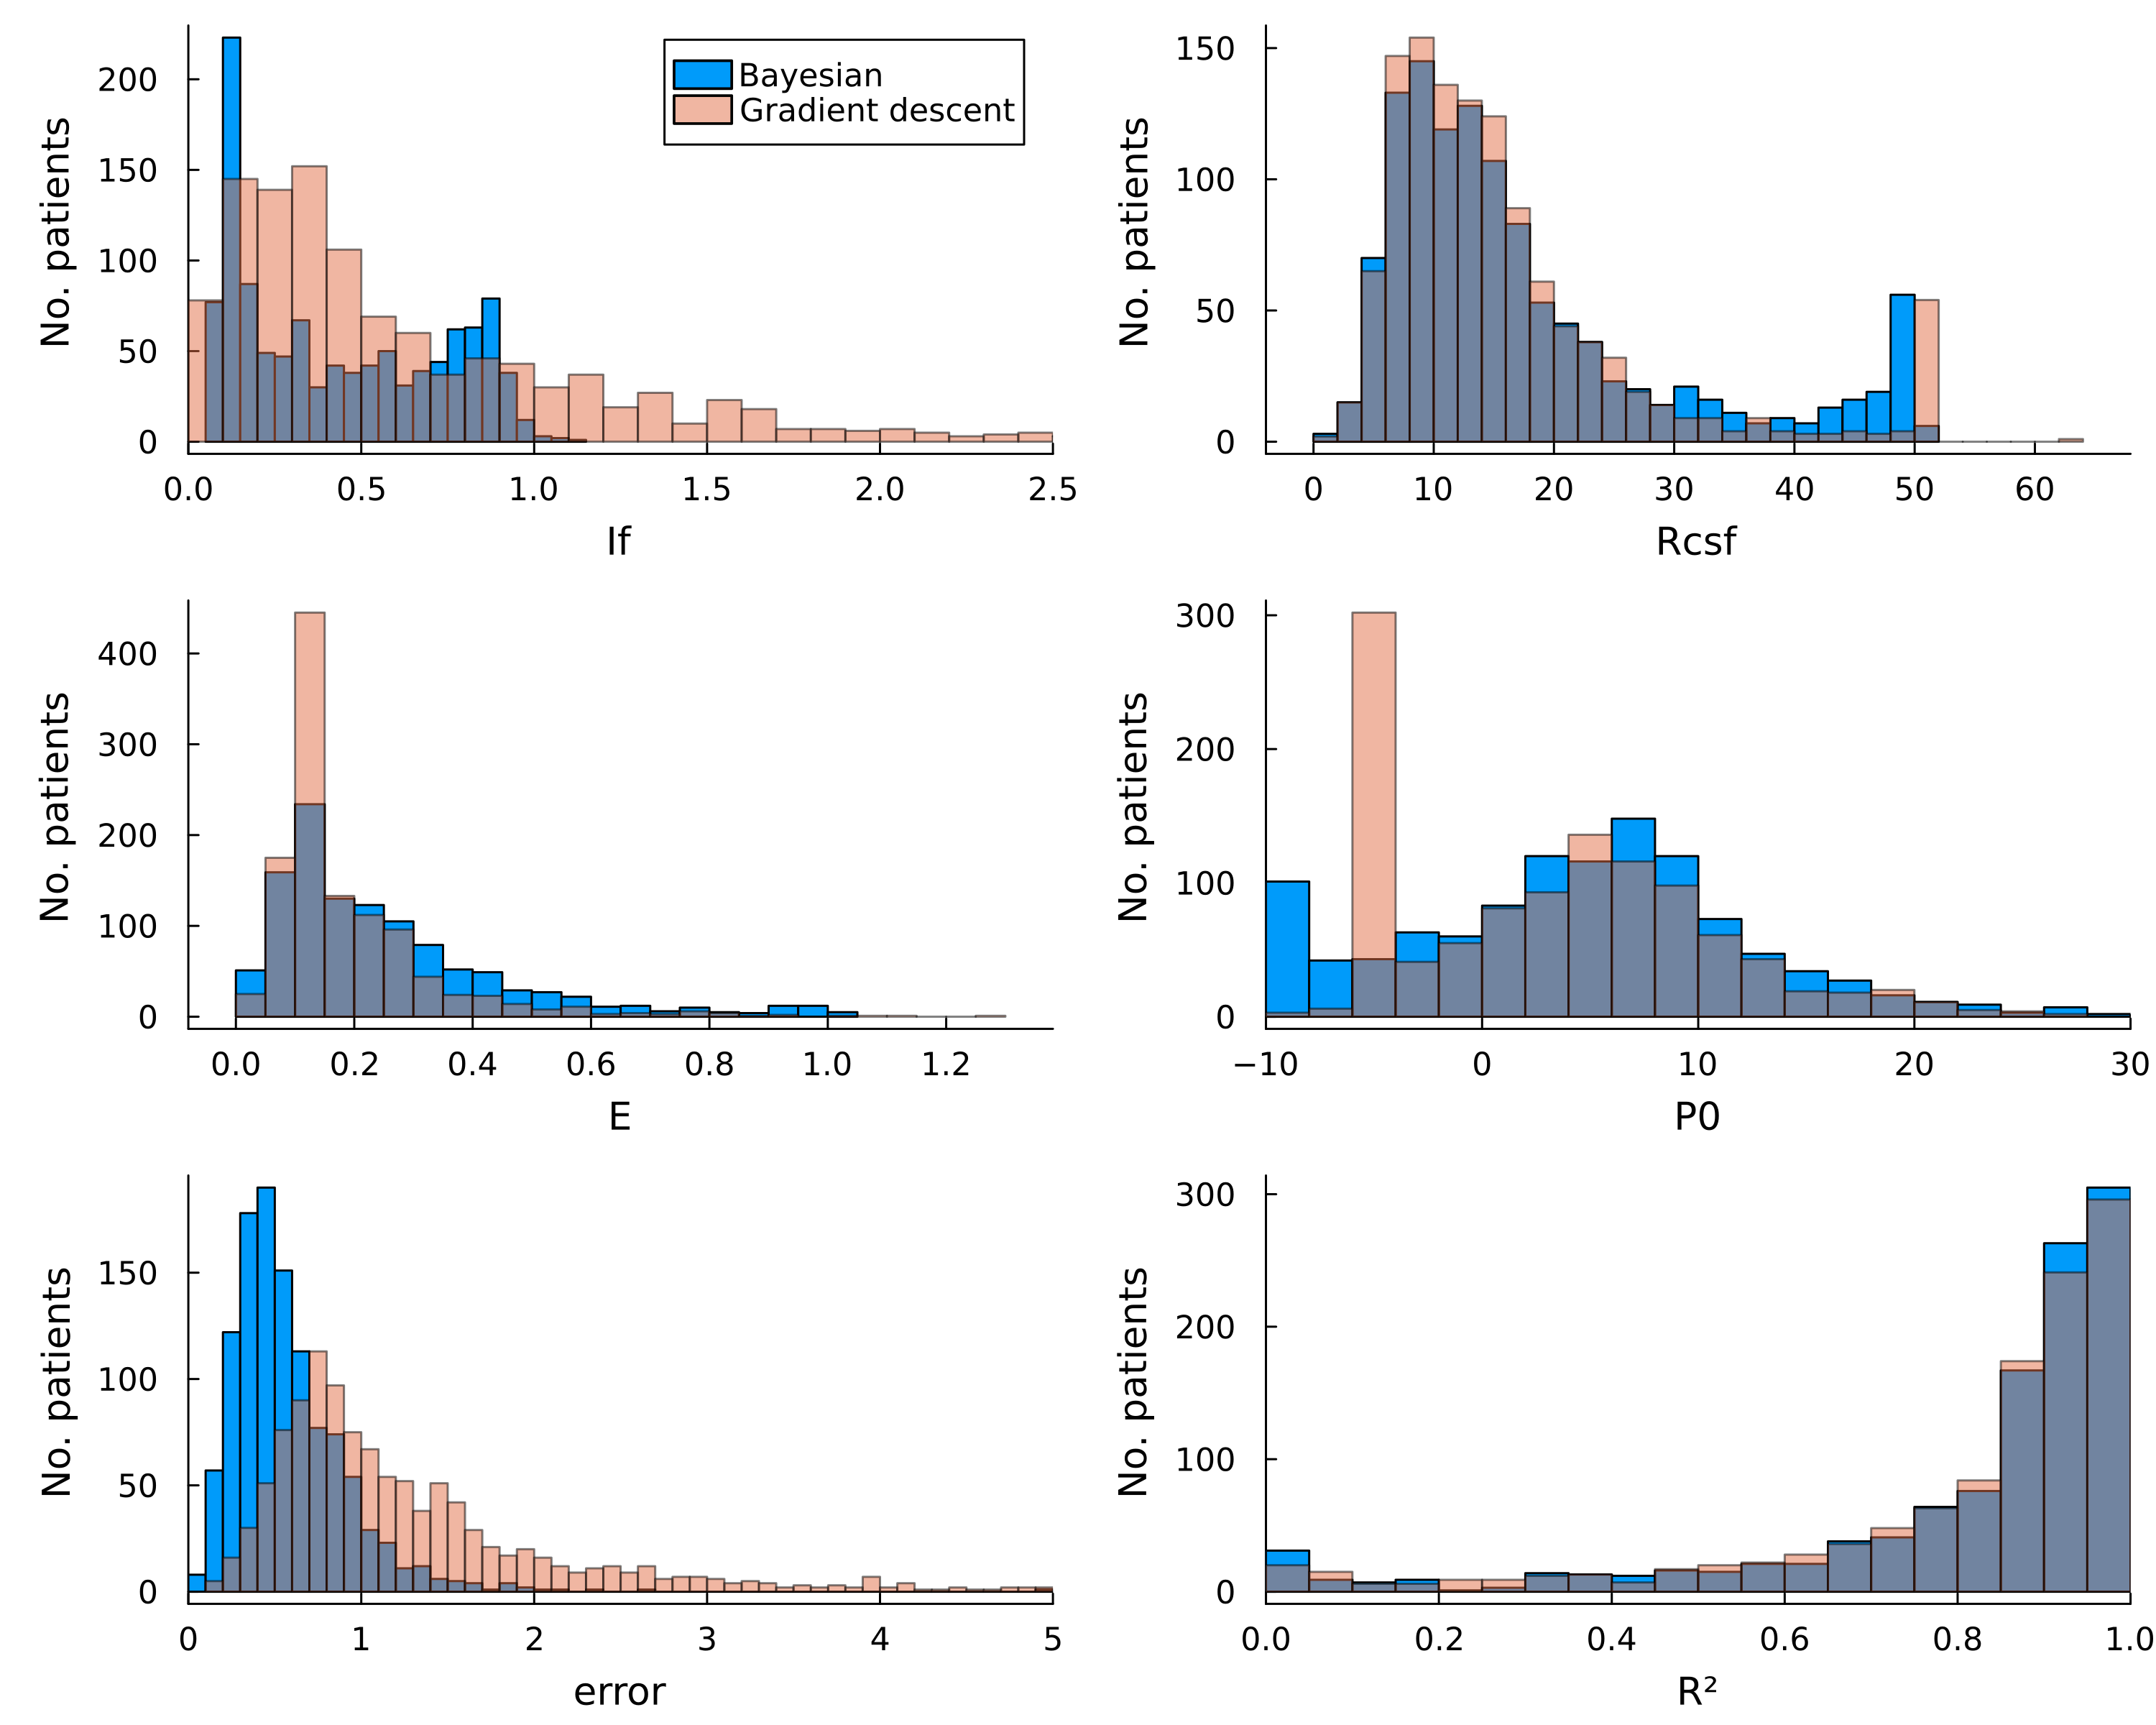

In [1]:
using CSV, Plots, StatsBase, EffectSizes, HypothesisTests

dfBayes = CSV.File("/Users/jjc/CSF/Results/Results_BayesSTD.csv")
# dfBayes = CSV.File("/Users/jjc/CSF/Results/Results_Bayes4params.csv")
# dfBayes = CSV.File("/Users/jjc/CSF/Results/Results_BayesPss.csv")


dfICM = CSV.File("/Users/jjc/CSF/Results/results_raw_icm.csv")

torm = .~(isnan.(dfBayes.R2))
Rcsf = dfBayes.Rcsf[torm]
E = dfBayes.E[torm]
Ib = dfBayes.Ib[torm]
P0 = dfBayes.P0[torm]
error = dfBayes.error[torm]
r2 = dfBayes.R2[torm]
# low_p0 = P0 .< -9.0
# high_rcsf = Rcsf .> 40.0
# high_ib = Ib .>= 1.0

Rcsf_icm = dfICM.Rcsf[torm]
E_icm =    dfICM.E[torm]
Ib_icm =   dfICM.Ib[torm]
P0_icm =   dfICM.P0[torm]
error_icm = dfICM.error[torm]
r2_icm = dfICM.R2[torm]

# torm = low_p0 .|| high_rcsf .|| isnan.(Rcsf) .|| high_ib .|| isnan.(error_icm)
# torm = .~torm
# torm = Bool.(ones(length(error_icm)))



# histogram(P0[torm], bins=20, label="Bayesian")
# histogram!(P0_icm[torm],bins=40, alpha=0.5, xlabel="Rcsf", ylabel="\n No. patients", label="Gradient descent", grid=false, legendfontsize=14, labelfontsize=15, tickfontsize=15, xlims=[-10.0, 30])

# histogram(P0[torm], bins=20, label="Bayesian")
# histogram!(P0_icm[torm],bins=40, alpha=0.5, xlabel="Pss", ylabel="\n No. patients", label="Gradient descent", grid=false, legendfontsize=14, labelfontsize=15, tickfontsize=15, xlims=[-10.0, 30], dpi=300)

# Bins = collect(0:.5:3)
h1 = histogram([abs.(Ib)], nbins=20, label="Bayesian")
histogram!([Ib_icm], nbins=100, alpha=0.5, xlabel="If", ylabel="\n No. patients", label="Gradient descent", grid=false, legendfontsize=14, labelfontsize=15, tickfontsize=15, dpi=300, xlims=[0,2.5])

Bins = collect(0:1:50)
h2 = histogram([Rcsf; Bins], label="Bayesian", nbins=30)
histogram!([Rcsf_icm; Bins], alpha=0.5, xlabel="Rcsf", ylabel="\n No. patients", label="Gradient descent", grid=false, legendfontsize=14, labelfontsize=15, tickfontsize=15, dpi=300, legend=false)

Bins = collect(0:.1:1)
h3 = histogram([E;Bins], label="Bayesian")
histogram!([E_icm;Bins],alpha=0.5, xlabel="E", ylabel="\n No. patients", label="Gradient descent", grid=false, legendfontsize=14, labelfontsize=15, tickfontsize=15, dpi=300, legend=false)

Bins = collect(-20:.1:40)
h4 = histogram([P0], label="Bayesian")
histogram!(P0_icm, nbins=100,alpha=0.5, xlabel="P0", ylabel="\n No. patients", label="Gradient descent", grid=false, legendfontsize=14, labelfontsize=15, tickfontsize=15, dpi=300, xlims=[-10,30], legend=false)

# Bins = collect(0:0.1:10)
h5 = histogram([error], label="Bayesian")
histogram!([error_icm[error_icm.<1000]], nbins=500, alpha=0.5, xlabel="error", ylabel="\n No. patients", label="Gradient descent", grid=false, legendfontsize=14, labelfontsize=10, tickfontsize=15, dpi=300, xlims=[0,5], legend=false)

# h6 = plot(legend=false,grid=false,foreground_color_subplot=:transparent, axis=false)
h6 = histogram(r2, label="Bayesian")
histogram!([r2_icm], alpha=0.5, xlabel="R²", ylabel="\n No. patients", label="Gradient descent", grid=false, legendfontsize=14, labelfontsize=10, tickfontsize=15, dpi=300, xlims=[0,1], legend=false)


l = @layout [a b; c d; e f]
plot(h1,h2,h3,h4,h5,h6,layout=l, size=(1000,800),legendfontsize=10,labelfontsize=12,tickfontsize=10)



# savefig("/Users/jjc/CSF/Results/histogram_all.png")

In [39]:

# pval = pvalue(OneSampleTTest(error[error_icm.<100], error_icm[error_icm.<100]));
# es = effectsize(CohenD(error, error_icm[error_icm.<100], quantile=0.95));
using Printf
function wEffectSize(x)
    W = x.W
    n = x.n
    μ = n * (n + 1) / 4
    σ = sqrt(n * (n + 1) * (2 * n + 1) / 24)
    z = (W - μ) / σ
    r = z / sqrt(n)
    return r
end

macro Name(arg)
    string(arg)
end
vars = [Ib, Rcsf, E, P0, error[error_icm.<100], r2]
varnames = ["Ib", "Rcsf", "E", "P0", "error", "r2"]
vars_icm = [Ib_icm, Rcsf_icm, E_icm, P0_icm, error_icm[error_icm.<100], r2_icm]

for i = 1:length(vars)
# for i = 1:1
    wx = SignedRankTest(vars[i], vars_icm[i])
    pval = pvalue(wx)
    es = wEffectSize(wx)

    print(varnames[i] * ":\n")
    print(@sprintf("pval: %0.4f\n", pval))
    print(@sprintf("effects size: %0.2f\n", es))
    print("\n")
end


Ib:
pval: 0.0000
effects size: -0.47

Rcsf:
pval: 0.0079
effects size: 0.05

E:
pval: 0.0000
effects size: 0.25

P0:
pval: 0.0000
effects size: 0.26

error:
pval: 0.0000
effects size: -0.86

r2:
pval: 0.0000
effects size: 0.10



In [35]:
x = SignedRankTest(vars[1], vars_icm[1]);



wEffectSize (generic function with 1 method)

In [136]:
# (sum(Rcsf_icm.>=50) +
# sum(Rcsf_icm.<=0) +
# sum(E_icm.>=1) +
# sum(E_icm.<=0) +
# sum(Ib_icm.>=1) +
# sum(Ib_icm.<=0.0) + 
# sum(P0_icm.>=40) +
# sum(P0_icm.<=-10))

print(sum(Rcsf_icm.>=50))
print("\n")
print(sum(Rcsf_icm.<=0))
print("\n")
print(sum(E_icm.>=1))
print("\n")
print(sum(E_icm.<=0))
print("\n")
print(sum(Ib_icm.>=1))
print("\n")
print(sum(Ib_icm.<=0.0))
print("\n")
print(sum(P0_icm.>=40))
print("\n")
print(sum(P0_icm.<=-10))



54
0
3
0
251
2
0
11

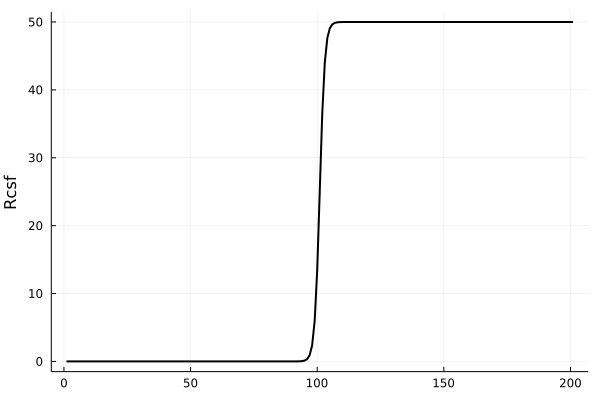

In [91]:
x = collect(-100:100)
lb = 0.0
ub = 50.0
f(x) = 1/(1 + exp(-x))
function sigmoid(x, lb, ub)
    (ub - lb) * (1/(1 + exp(-x))) + lb
end
plot(sigmoid.(x, lb, ub), ylabel="Rcsf", label="", lw=2, color=:black, xticks=(collect(0:50:200)))